In [0]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git


Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 36.58 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [0]:
cd  OIDv4_ToolKit

/content/OIDv4_ToolKit


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%cd /content/gdrive/My Drive/OIDv4_ToolKit
!pip install -r requirements.txt

/content/gdrive/My Drive/OIDv4_ToolKit
     |████████████████████████████████| 3.1MB 2.7MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 6.2MB 23.2MB/s 
  Found existing installation: rsa 4.0
    Uninstalling rsa-4.0:
      Successfully uninstalled rsa-4.0
  Found existing installation: botocore 1.16.13
    Uninstalling botocore-1.16.13:
      Successfully uninstalled botocore-1.16.13


In [0]:
!python3 main.py downloader --classes  Tank   --type_csv all
#!python3 main.py downloader --classes  Helicopter  --type_csv  test  --limit  500  


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Tank.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] y
...145%, 0 MB, 45806 KB/s, 0 seconds passed
[DOWNLOAD] | File cla

In [0]:
import os
import shutil
import zipfile
import urllib
import xml.etree.ElementTree as ET
import numpy as np
import csv
import pandas
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive') 
OID_DATASET = '/content/OIDv4_ToolKit/OID/Dataset'
DRIVE_DIR = '/content/gdrive/My Drive/OID_DATASETTank/'


shutil.copytree(OID_DATASET,DRIVE_DIR)

Mounted at /content/gdrive


'/content/gdrive/My Drive/OID_DATASETTank/'

In [0]:
import pandas as pd
import os
new_data = pd.DataFrame(columns = ['image_location','x1','y1','x2','y2','class'])
new_data3 = pd.DataFrame(columns = ['class','x1','y1','x2','y2'])
dfs = []

In [0]:
## CHange the path based on test/train/validation dataset and change label class too
path = '/content/OIDv4_ToolKit/OID/Dataset'
class_label = 'Tank'
current_dataset = 'train/Tank'
current_dataset1 = '/train/Tank'
download_dir = path + current_dataset1
download_dir2= path + current_dataset1 + '/Label'


downloaded_images_list = [f.split('.')[0] for f in os.listdir(download_dir) if f.endswith('.jpg')]
images_label_list = list(set(downloaded_images_list))





for image in images_label_list:
    current_image_path = os.path.join(download_dir2, image + '.txt')
    new_data1 = pd.read_csv(current_image_path, sep=" ", header=None)
    new_data1.columns = ['class','x1','y1','x2','y2']
    new_data1['image_location'] = current_dataset +'/'+ image + '.jpg'
    #new_data1    
    dfs.append(new_data1)
   
   
new_data3 = pd.concat(dfs,ignore_index = True)
new_data3.tail()

,class,x1,y1,x2,y2,image_location
1711,Tank,12.160000,0.000000,1023.360000,767.360256,train/Tank/27aff01e4c08171a.jpg
1712,Tank,74.880000,30.749754,691.200000,306.859252,train/Tank/11eb6f4c68969afb.jpg
1713,Tank,623.360000,20.499836,810.880000,176.812664,train/Tank/11eb6f4c68969afb.jpg
1714,Tank,342.871040,0.000000,1023.230976,702.230918,train/Tank/872f62a994f3782e.jpg
1715,Tank,64.079872,0.000000,1022.717952,766.718208,train/Tank/a33847cc6b573c97.jpg


In [0]:
#Once Complete above step run this loop

new_data['image_location'] =  new_data3['image_location']
new_data['x1'] = new_data3['x1'].astype(int)
new_data['y1'] = new_data3['y1'].astype(int) 
new_data['x2'] = new_data3['x2'].astype(int)
new_data['y2'] = new_data3['y2'].astype(int)
new_data['class'] = new_data3['class']
new_data.shape

(1716, 6)

In [0]:
# Final Save to Server

with open(path +'/OID_asPer_Retina.csv', 'a') as f:
    new_data.to_csv(f, index=False, header=None)
    
pd.DataFrame({'class_name':['Tank'], 'label_encoding':[0]}).to_csv(path+'/class_mapping.csv', header=None, index=False)

In [0]:
# Final Save to Drive

import os
import shutil
import zipfile
import urllib
import xml.etree.ElementTree as ET
import numpy as np
import csv
import pandas
from google.colab import drive
from google.colab import files
#drive.mount('/content/gdrive') 
OID_DATASET = '/content/OIDv4_ToolKit/OID/Dataset'
DRIVE_DIR = '/content/gdrive/My Drive/OID_DATASETTank/'
#shutil.copytree(OID_DATASET,DRIVE_DIR)
shutil.copy('/content/OIDv4_ToolKit/OID/Dataset/OID_asPer_Retina.csv', DRIVE_DIR)
shutil.copy('/content/OIDv4_ToolKit/OID/Dataset/class_mapping.csv', DRIVE_DIR)

In [0]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 5711 (delta 0), reused 1 (delta 0), pack-reused 5705
Receiving objects: 100% (5711/5711), 13.37 MiB | 29.50 MiB/s, done.
Resolving deltas: 100% (3831/3831), done.


In [0]:
%cd /content/gdrive/My Drive/OIDv4_ToolKit/keras-retinanet/

!pip install .

/content/gdrive/My Drive/OIDv4_ToolKit/keras-retinanet
Processing /content/gdrive/My Drive/OIDv4_ToolKit/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=170126 sha256=941ba03cf7510d9166cbc4e6205620f79b5b601d677e6dcbe5df928815a8affd
  Stored in directory: /root/.cache/pip/wheels/ea/a9/ae/efbdccf6ef7ac43b17dff8b63db13017ea38243c26a00f92f8
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13346 sha256=34cf99a8a7b72eaf429f1d3dd82374c85b3ff53afcc407fec9426610e1975c46
  Stored in directory: /root/.cache/pip/wheels/80/dd/ac/842235b63dddac12faa4b48ebe58b8944e8c2e57c2e38dddb6
Successfully built keras-retinanet keras-resnet


In [0]:
!python setup.py build_ext --inplace

running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-3.6/keras_retinanet/utils/compute_overlap.cpython-36m-x86_64-linux-gnu.so -> keras_retinanet/utils


In [0]:
!git clone https://github.com/AtriSaxena/OIDv4_to_VOC.git

Cloning into 'OIDv4_to_VOC'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 26 (delta 3), reused 5 (delta 1), pack-reused 14
Unpacking objects: 100% (26/26), done.


In [0]:
%cd /content/gdrive/My Drive/OIDv4_ToolKit/keras-retinanet/OIDv4_to_VOC

/content/gdrive/My Drive/OIDv4_ToolKit/keras-retinanet/OIDv4_to_VOC


In [0]:
!pip install -r requirements.txt

In [0]:
%cd OIDv4_ToolKit/keras-retinanet/OIDv4_to_VOC/

[Errno 2] No such file or directory: 'OIDv4_ToolKit/keras-retinanet/OIDv4_to_VOC/'
/content


In [0]:
!python OIDv4_to_VOC.py --sourcepath '/content/gdrive/My Drive/OID_DATASETTank/train/Tank' --dest_path '/content/gdrive/My Drive/OID_DATASETTank/train/Annotation/Tank'

In [0]:
DATASET_DIR = '/content/gdrive/My Drive/OID_DATASETTank/train/Annotation/Tank'
ANNOTATIONS_FILE = '/content/gdrive/My Drive/OID_DATASETTank/annotations.csv'
CLASSES_FILE = '/content/gdrive/My Drive/OID_DATASETTank/classes.csv'
PRETRAINED_MODEL = '/content/gdrive/My Drive/OIDv4_ToolKit/keras-retinanet/snapshots/_pretrained_model.h5'

In [0]:
import os
import shutil
import zipfile
import urllib
import xml.etree.ElementTree as ET
import numpy as np
import csv
import pandas
from google.colab import drive
from google.colab import files

In [0]:
annotations = []
classes = set([])

for xml_file in [f for f in os.listdir(DATASET_DIR) if f.endswith(".xml")]:
  tree = ET.parse(os.path.join(DATASET_DIR, xml_file))
  root = tree.getroot()

  file_name = None

  for elem in root:
    if elem.tag == 'filename':
      file_name = os.path.join(DATASET_DIR, elem.text)

    if elem.tag == 'object':
      obj_name = None
      coords = []
      for subelem in elem:
        if subelem.tag == 'name':
          obj_name = subelem.text
        if subelem.tag == 'bndbox':
          for subsubelem in subelem:
            coords.append(subsubelem.text)
      item = [file_name] + coords + [obj_name]
      annotations.append(item)
      classes.add(obj_name)

with open(ANNOTATIONS_FILE, 'w') as f:
  writer = csv.writer(f)
  writer.writerows(annotations)

with open(CLASSES_FILE, 'w') as f:
  for i, line in enumerate(classes):
    f.write('{},{}\n'.format(line,i))

In [0]:
import urllib
URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

('/content/gdrive/My Drive/OIDv4_ToolKit/keras-retinanet/snapshots/_pretrained_model.h5',
 <http.client.HTTPMessage at 0x7fa5c0de29e8>)

In [0]:
%cd /content/gdrive/My Drive/OIDv4_ToolKit/keras-retinanet/keras_retinanet/bin
!ls

/content/gdrive/My Drive/OIDv4_ToolKit/keras-retinanet/keras_retinanet/bin
convert_model.py  evaluate.py  __pycache__  train.py
debug.py	  __init__.py  snapshots


In [0]:
!python train.py --freeze-backbone --random-transform --weights '/content/gdrive/My Drive/OIDv4_ToolKit/keras-retinanet/keras_retinanet/bin/snapshots/resnet50_csv_04.h5' --batch-size 8 --steps 75 --epochs 4 csv '/content/gdrive/My Drive/OID_DATASETTank/annotations.csv' '/content/gdrive/My Drive/OID_DATASETTank/classes.csv'

72/75 [===========================>..] - ETA: 5:49 - loss: 1.7116 - regression_loss: 1.3843 - classification_loss: 0.3273

In [0]:
%matplotlib inline

# automatically reload modules when they have changed
%reload_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

# def get_session():
#     config = tf.ConfigProto()
#     config.gpu_options.allow_growth = True
#     return tf.Session(config=config)

# # use this environment flag to change which GPU to use
# #os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# # set the modified tf session as backend in keras
# keras.backend.tensorflow_backend.set_session(get_session())

Using TensorFlow backend.


In [0]:
model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

# load label to names mapping for visualization purposes
labels_to_names = pandas.read_csv(CLASSES_FILE,header=None).T.loc[0].to_dict()

snapshots/resnet50_csv_04.h5
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [

In [0]:
THRES_SCORE = 0.7

In [0]:
def img_inference(img_path):
  image = read_image_bgr(img_infer)

  # copy to draw on
  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  # preprocess image for network
  image = preprocess_image(image)
  image, scale = resize_image(image)

  # process image
  start = time.time()
  boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
  print("processing time: ", time.time() - start)
 
  # correct for image scale
  boxes /= scale

  # visualize detections
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
      # scores are sorted so we can break
      if score < THRES_SCORE:
          break

      color = label_color(label)

      b = box.astype(int)
      draw_box(draw, b, color=color)

      caption = "{} {:.3f}".format(labels_to_names[label], score)
      print(caption)
      draw_caption(draw, b, caption)

  plt.figure(figsize=(10, 10))
  plt.axis('off')
  plt.imshow(draw)
  plt.show()

In [0]:
#print(model.summary)
print(len(model.layers))

216


Running inference on: /content/gdrive/My Drive/OID_DATASETTank/test/Tank/313866fa2e3dac6b.jpg
processing time:  6.468717813491821
Tank 0.900


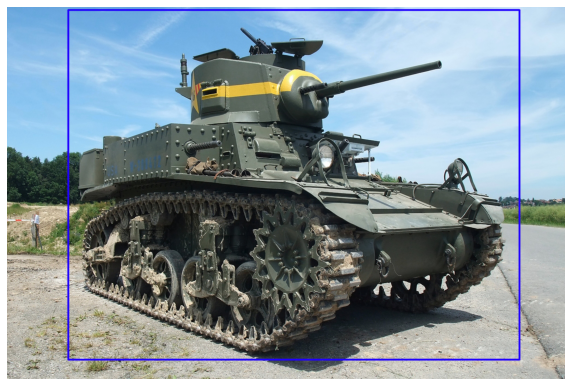

In [0]:

img_infer = '/content/gdrive/My Drive/OID_DATASETTank/test/Tank/313866fa2e3dac6b.jpg'

print('Running inference on: ' + img_infer)
img_inference(img_infer)

In [0]:
!mv /content/OIDv4_ToolKit /content/gdrive/My Drive/OID_with_model_files/

mv: target 'Drive/OID_with_model_files/' is not a directory


In [0]:
shutil.copytree('/content/OIDv4_ToolKit','/content/gdrive/My Drive')